# Linear Regression Exercise 1-2
이 연습에서는 다수의 변수를 갖는 선형회귀를 처리합니다.

## 다변량 선형회귀
이 연습에는 2 개의 변수(주택 크기와 침실 수)와 목표(주택 가격)가 포함 된 주택 가격 데이터 세트가 포함되었습니다. 데이터 세트를 분석하기 위해 선형회귀 기술을 사용합시다.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [67]:
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


이 작업을 위해 특징(feature)을 정규화하는(normalization) 또 다른 사전처리 단계를 추가합니다. 이것은 pandas 로 아주 쉽습니다. 각 특징의 평균(data.mean())을 빼주고, 표준편차(data.std())로 나누어 줍니다.

In [68]:
#============ (1) your code is here (2 points) ========
data = 
#======================================================
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


훈련 자료에 1 열을 추가하여, 비용 및 그레디언트를 계산하기 위해 벡터화 된 솔루션을 사용할 수 있도록 하겠습니다. 그리고 새로운 데이터 세트에 대한 선형회귀 절차를 실행해 봅시다.

In [69]:
# add ones column
#=========(2) your code is here (2 points) ===============

#=========================================================

# set X (training data) and y (target variable)
#=========(3) your code is here (4 points) ===============
cols = data.shape[1]
X = 
y = 
#=========================================================

# convert to numpy array and initialize theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.array([[0],[0],[0]])
print(X.shape, theta.shape, y.shape)

(47, 3) (3, 1) (47, 1)


### 비용 $J(\theta)$의 계산 : computeCost( )

In [70]:
def computeCost(X, y, theta):
    loss = np.power(np.dot(X,theta) - y, 2)
    cost = np.sum(loss) / (2 * X.shape[0])
    return cost

### 경사 하강 : gradientDescent( ) 

In [71]:
def gradientDescent(X, y, theta, alpha, niter):
    temp = np.zeros(theta.shape)
    cost = np.zeros(niter)
    
    for i in range(niter):
        error = np.dot(X,theta) - y
        for j in range(len(theta)):
            dtheta = np.dot(error.T, X[:,j]) / len(X)
            temp[j] = theta[j] - alpha * dtheta
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

몇 가지 추가 변수 (학습 속도 $\alpha$ 및 반복 수행 횟수 niter)를 초기화하십시오.

In [72]:
alpha = 0.01
niter = 1000

이제 경사하강 알고리즘을 실행하여, 우리의 매개변수인 $\theta$를 훈련 세트에 맞춥니다.

In [73]:
# perform linear regression on the data set
#=========(4) your code is here (2 points) ===============
g, cost = 
#=========================================================

# get the cost (error) of the model
computeCost(X, y, g)

0.13070336960771892

이 과정의 진행 상황을 간략하게 살펴볼 수 있습니다.

Text(0.5, 1.0, 'Error vs. Training Epoch')

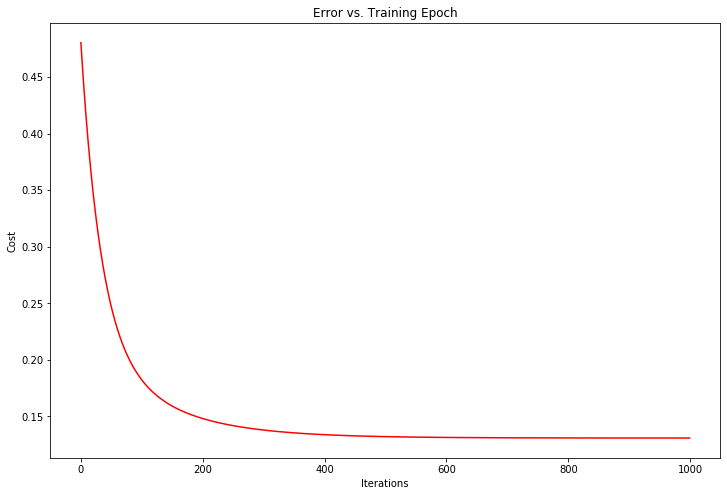

In [74]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(niter), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### scikit-learn 을 사용한 선형회귀

이러한 알고리즘을 처음부터 구현하는 대신 scikit-learn의 선형회귀 함수를 사용할 수도 있습니다. 파트 1의 데이터에 scikit-learn의 선형 회귀 알고리즘을 적용하고 그 결과를 확인해 봅시다.

In [75]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

scikit-learn 모델의 예측은 다음과 같습니다.

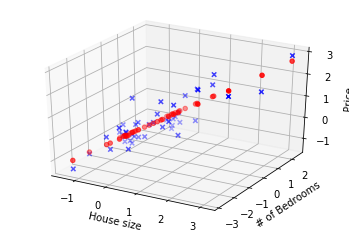

In [76]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], y, c='b', marker='x')
ax.scatter(X[:,1], X[:,2], model.predict(X), c='r', marker='o')

ax.set_xlabel('House size')
ax.set_ylabel('# of Bedrooms')
ax.set_zlabel('Price')

plt.show()
